# DeSeq2 analysis 

In [1]:
library("DESeq2")
library(scales)
options(repr.plot.width=4, repr.plot.height=3)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

In [7]:
matrixFile = path.expand("/mnt/storage/r0636613/jupyternotebooks/Part1/all.gene.counts")

In [8]:
countData <- as.matrix(read.csv(matrixFile, sep="\t", row.names="Geneid"))
head(countData)

,control1.bam,control2.bam,control3.bam,treated1.bam,treated2.bam,treated3.bam
DDX11L1,0,0,0,0,0,0
WASH7P,504,515,653,494,1051,818
MIR6859-1,0,0,0,0,0,0
MIR6859-2,0,0,0,0,0,0
MIR6859-3,0,0,0,0,0,0
MIR6859-4,0,0,0,0,0,0


In [9]:
colnames(countData) <- c("control1", "control2", "control3", "treated1", "treated2", "treated3")
head(countData)

,control1,control2,control3,treated1,treated2,treated3
DDX11L1,0,0,0,0,0,0
WASH7P,504,515,653,494,1051,818
MIR6859-1,0,0,0,0,0,0
MIR6859-2,0,0,0,0,0,0
MIR6859-3,0,0,0,0,0,0
MIR6859-4,0,0,0,0,0,0


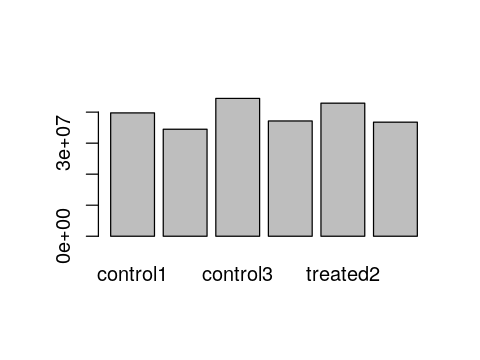

In [10]:
barplot(colSums(countData))

In [13]:
condition <- factor(c("control", "control", "control", "treated", "treated", "treated"))
print(condition)

[1] control control control treated treated treated
Levels: control treated


In [14]:
colData <- data.frame(sampleName = colnames(countData),
                      condition = condition)
colData

sampleName,condition
<fct>,<fct>
control1,control
control2,control
control3,control
treated1,treated
treated2,treated
treated3,treated


In [16]:
dds <- DESeqDataSetFromMatrix(countData = countData,
                              colData = colData,
                              design = ~ condition)
#we need to do this to ensure the column names are correct.
colnames(dds) <- colnames(countData)
dds
dds$condition

class: DESeqDataSet 
dim: 28278 6 
metadata(1): version
assays(1): counts
rownames(28278): DDX11L1 WASH7P ... ZBTB41 TMEM181
rowData names(0):
colnames(6): control1 control2 ... treated2 treated3
colData names(2): sampleName condition

[1] control control control treated treated treated
Levels: control treated

In [17]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



# Quality control

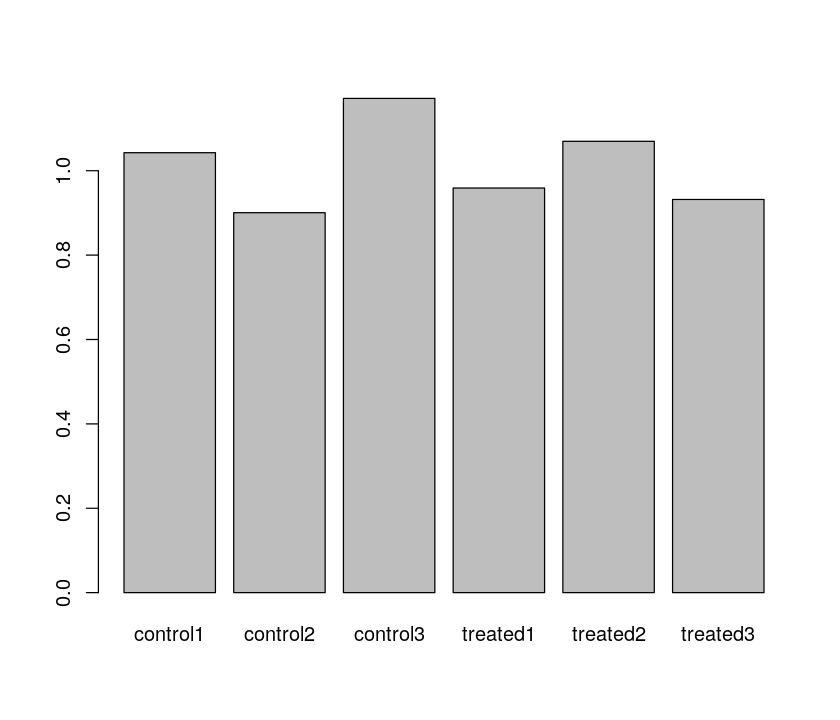

In [36]:
options(repr.plot.width=7, repr.plot.height=6)
barplot(sizeFactors(dds))

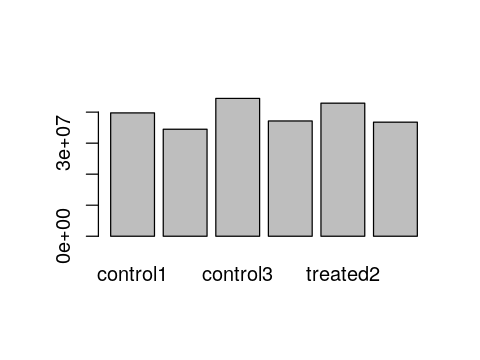

In [19]:
barplot(colSums(countData))

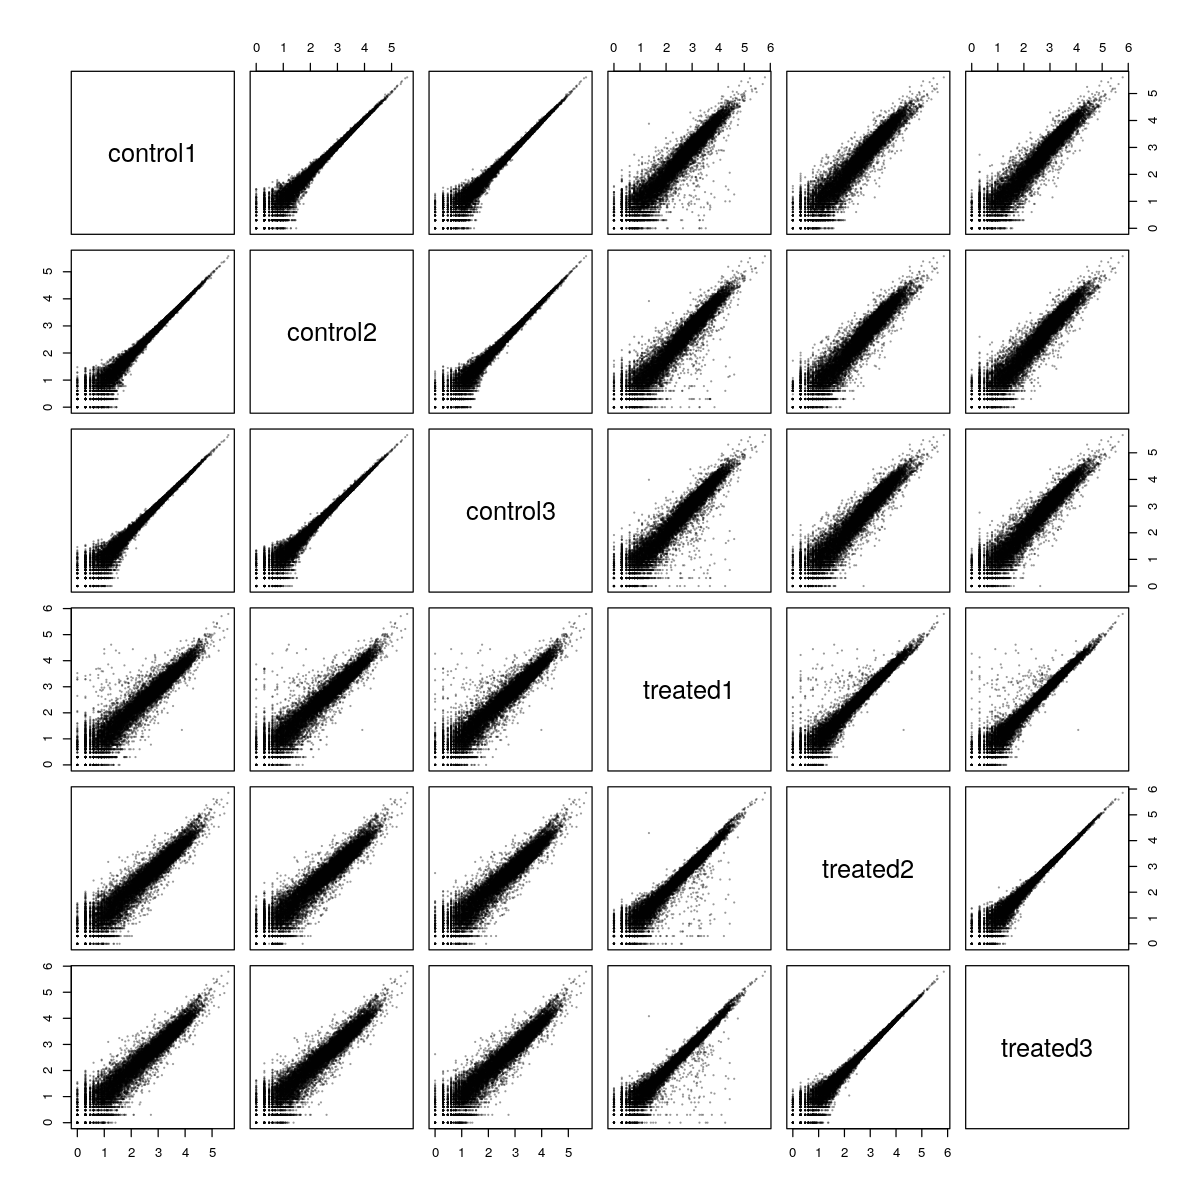

In [37]:
options(repr.plot.width=10, repr.plot.height=10)
plot(data.frame(log10(counts(dds))), cex=0.1, col=alpha("black", 0.4))

Analysis of this correlation plot showed us that there is significant difference between the conditions. This can be demonstrated by the narrow shapes of instances of the same level (treatment / control), this indicates that these plots are highly similar and hence behave in a similar way. The plots of instances of different levels show more spread out shapes, this indicates the difference between the conditions. Combining both insights it can be said that the experiment is working well and I can move on doing my analysis.

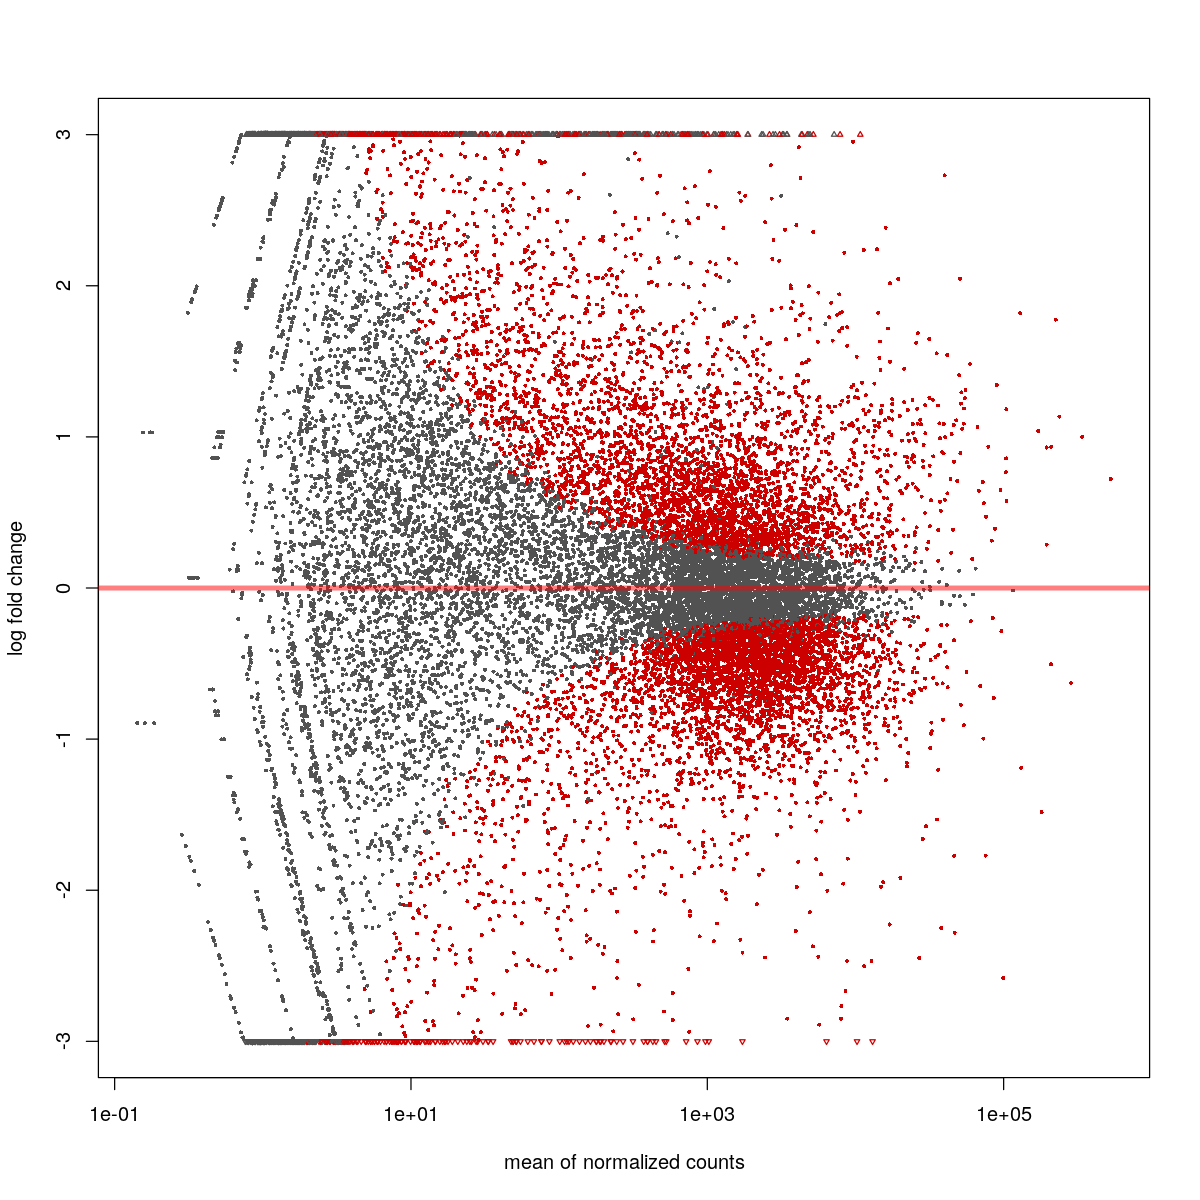

In [39]:
options(repr.plot.width=10, repr.plot.height=10)
plotMA(dds,ylim=c(-3,3))
# red dots indicate the signifcantly expressed genes in the MA-plot
# red dots above the line stand for upregulated genes after treatment
# red dotss below the line stand for downregulated genes after treatment

# export the results

In [22]:
res <- results(dds)
res <- res[order(res$padj),]
head(res)

log2 fold change (MLE): condition treated vs control 
Wald test p-value: condition treated vs control 
DataFrame with 6 rows and 6 columns
                  baseMean    log2FoldChange              lfcSE
                 <numeric>         <numeric>          <numeric>
LINC01050  7872.0131642885  4.18139319591147   0.09913066578578
CPNE7     9643.11389170911  2.95373716257757 0.0796675590926379
MMP3       5196.7425375785  3.74114400066209  0.102550455074693
IGFBP3    13041.4036595339 -3.34373904468043 0.0953716602843891
CA9       10243.6613290902 -4.18696691119237   0.12395999390101
GPNMB     10774.9157921703  3.42724083769271  0.102074254634029
                       stat                pvalue                  padj
                  <numeric>             <numeric>             <numeric>
LINC01050  42.1806225426489                     0                     0
CPNE7      37.0757833705303 6.90175131661331e-301 6.21675249843944e-297
MMP3       36.4810082796532 2.21875531373586e-291 1.332362565

In [40]:
res$E

NULL

In [23]:
res.sign <- res[(!is.na(res$padj)) & (res$padj < 0.05),]
dim(res.sign)

[1] 7737    6

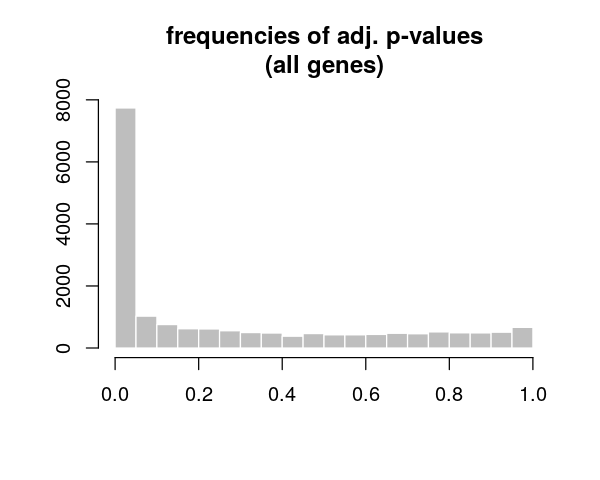

In [24]:
hist(res$padj, 
     col="grey", border="white", xlab="", ylab="", main="frequencies of adj. p-values\n(all genes)")

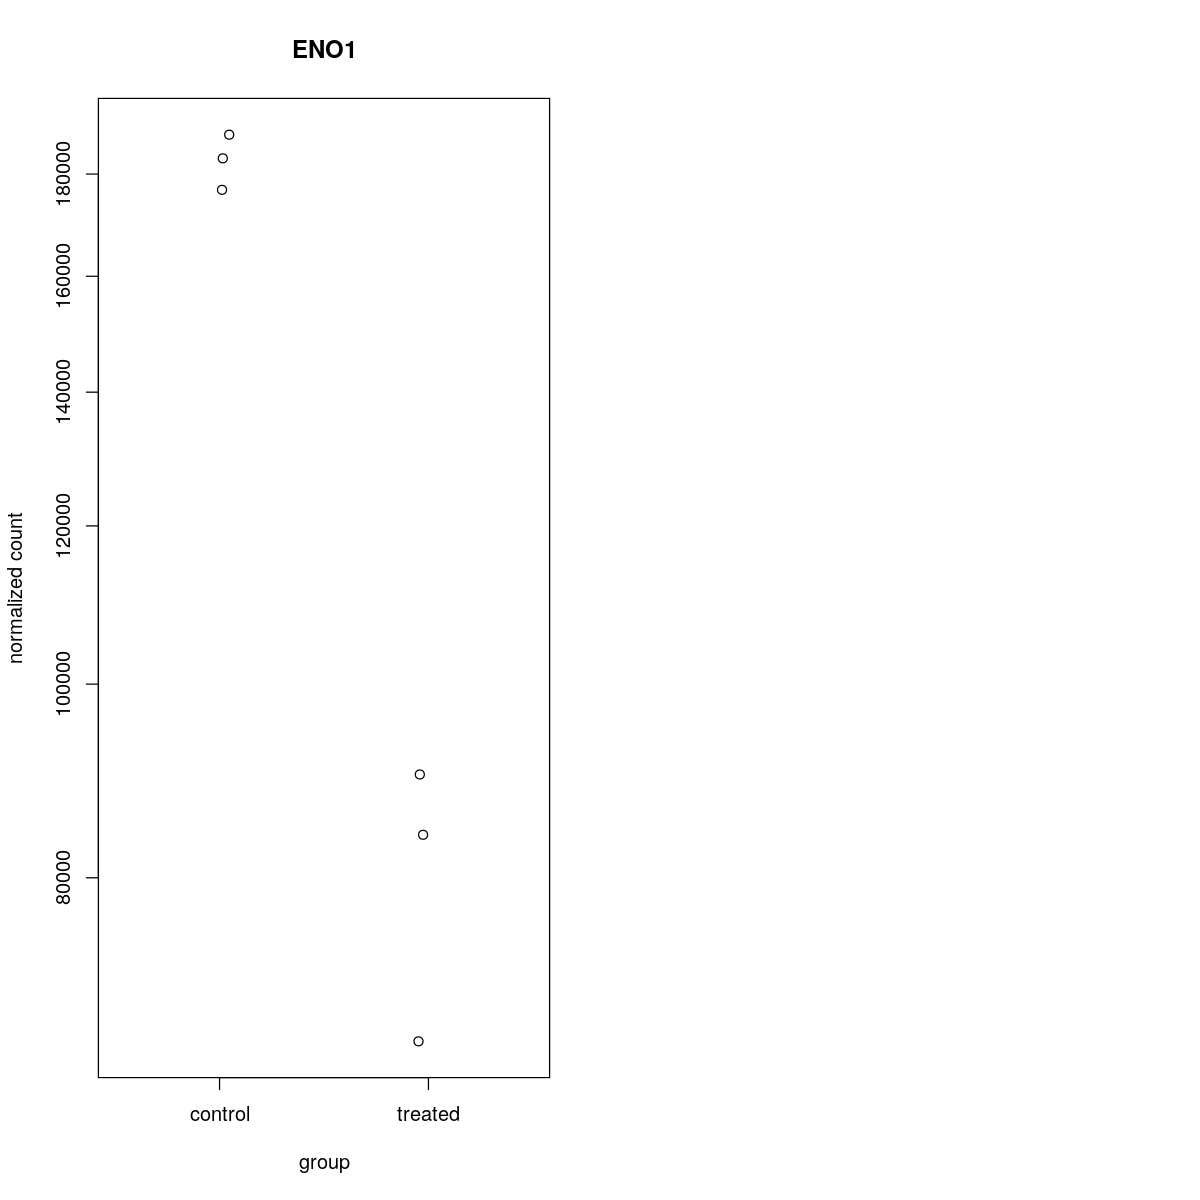

In [41]:
par(mfrow=c(1,2))
plotCounts(dds, gene="ENO1", normalized = TRUE)

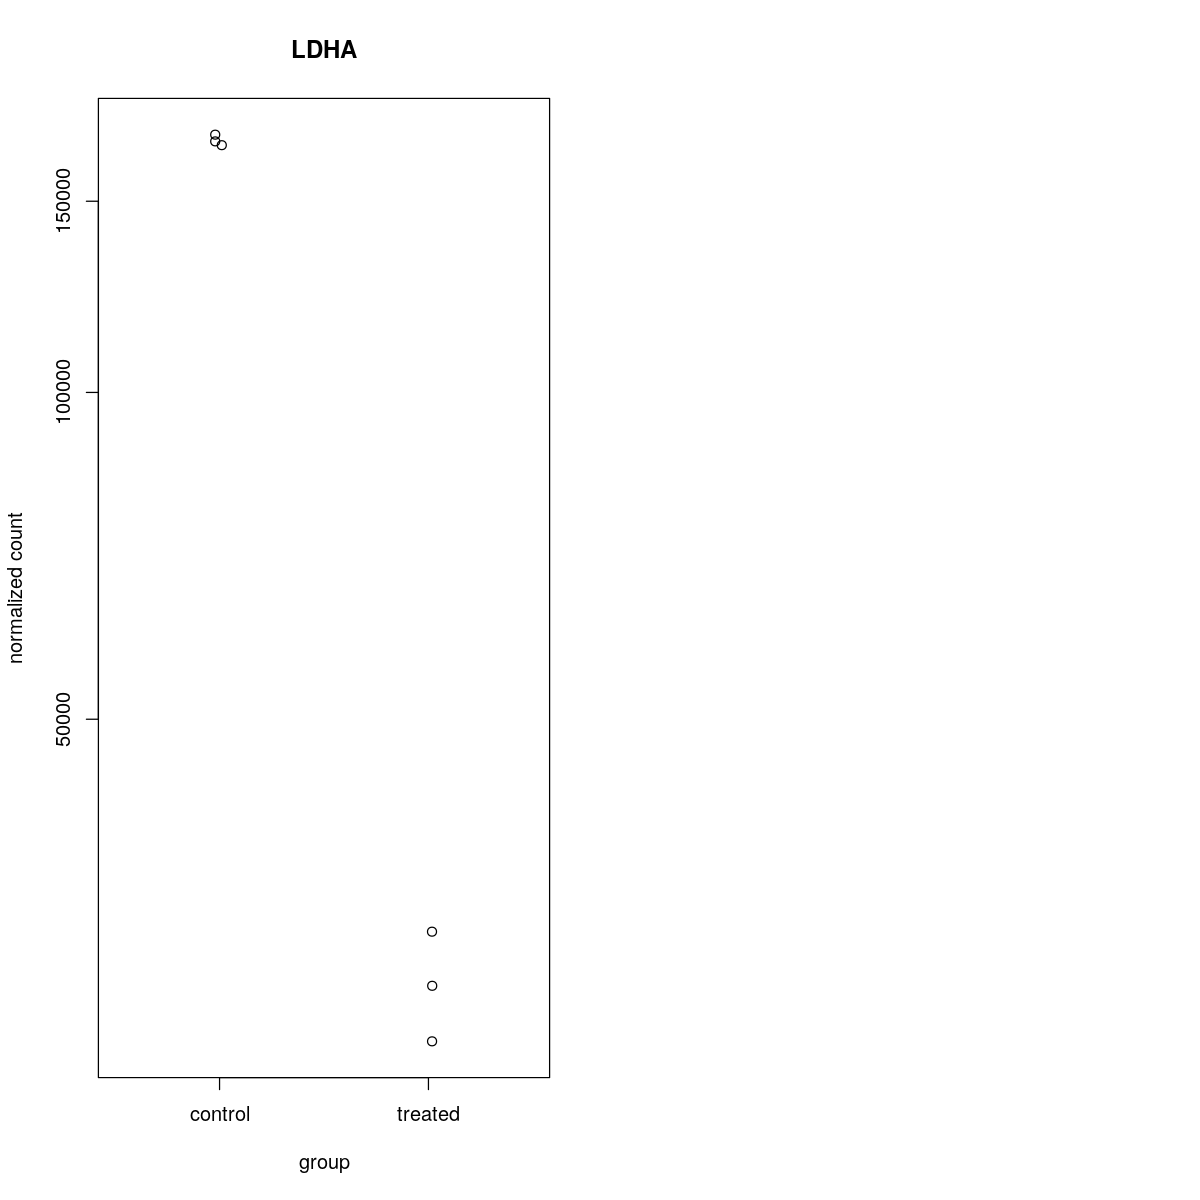

In [42]:
par(mfrow=c(1,2))
plotCounts(dds, gene="LDHA", normalized = TRUE)

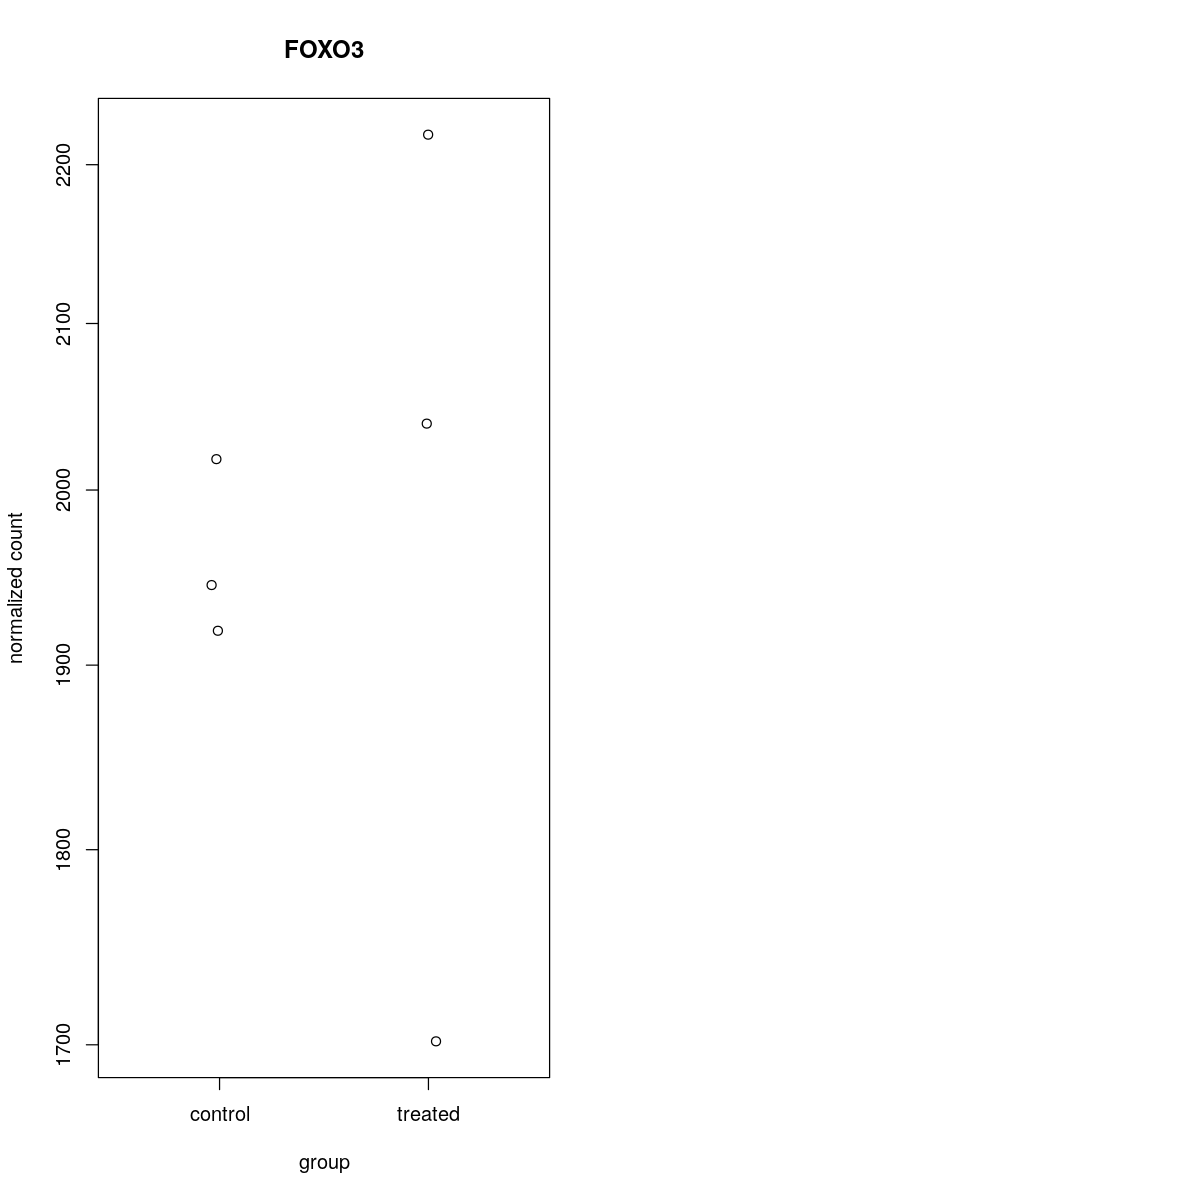

In [45]:
par(mfrow=c(1,2))
plotCounts(dds, gene="FOXO3", normalized = TRUE)

In [47]:
write.table(res, "deseq.results.tsv", sep="\t", col.names=NA, quote=FALSE)

In [26]:
res.sorted <- res[order(res$padj),]
head(res.sorted)

log2 fold change (MLE): condition treated vs control 
Wald test p-value: condition treated vs control 
DataFrame with 6 rows and 6 columns
                  baseMean    log2FoldChange              lfcSE
                 <numeric>         <numeric>          <numeric>
LINC01050  7872.0131642885  4.18139319591147   0.09913066578578
CPNE7     9643.11389170911  2.95373716257757 0.0796675590926379
MMP3       5196.7425375785  3.74114400066209  0.102550455074693
IGFBP3    13041.4036595339 -3.34373904468043 0.0953716602843891
CA9       10243.6613290902 -4.18696691119237   0.12395999390101
GPNMB     10774.9157921703  3.42724083769271  0.102074254634029
                       stat                pvalue                  padj
                  <numeric>             <numeric>             <numeric>
LINC01050  42.1806225426489                     0                     0
CPNE7      37.0757833705303 6.90175131661331e-301 6.21675249843944e-297
MMP3       36.4810082796532 2.21875531373586e-291 1.332362565

In [27]:
countData['MYC',]

control1 control2 control3 treated1 treated2 treated3 
    2280     2088     2606     5461     6650     5540

In [29]:
countData['ENO1',]

control1 control2 control3 treated1 treated2 treated3 
  196416   165069   207063    63540    96405    78338

In [30]:
countData['LDHA',]

control1 control2 control3 treated1 treated2 treated3 
  176168   153378   202367    24215    34086    26472

In [31]:
countData['FOXO3',]

control1 control2 control3 treated1 treated2 treated3 
    2104     1728     2278     2128     1820     1900